In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [2]:
ds = pd.read_csv('spam_ham_dataset.csv')
ds

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
def data_set():
    spam_df  = pd.read_csv('spam_ham_dataset.csv')
    return spam_df.drop('Unnamed: 0',axis=1)

In [4]:
data = data_set()
data

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
data.shape

(5171, 3)

In [6]:
data.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
data.tail()

,label,text,label_num
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0
5170,spam,Subject: important online banking alert\r\ndea...,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [9]:
data.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


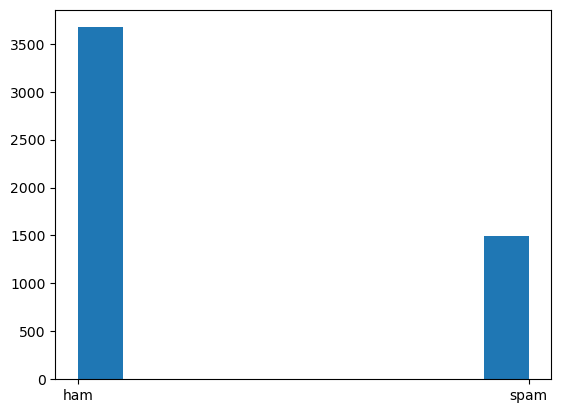

In [10]:
plt.hist(data['label'])
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
spamham_countVectorizer=vectorizer.fit_transform(data['text'])

In [12]:
label=data['label_num']
X=spamham_countVectorizer
y=label

In [13]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       720
           1       0.99      0.98      0.99       315

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

The Accuracy is 0.9922705314009662


<Axes: >

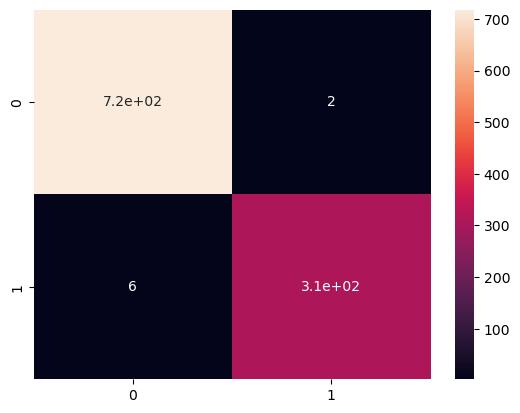

In [14]:
#Naive Bayes

NB_classifier=MultinomialNB()
NB_classifier.fit(X,y)
Y_pred=NB_classifier.predict(X_test)
cm=confusion_matrix(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))
print("The Accuracy is",accuracy_score(Y_test,Y_pred))
sns.heatmap(cm,annot=True)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       720
           1       0.96      0.98      0.97       315

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

The Accuracy is  0.9826086956521739


C:\Users\karpa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

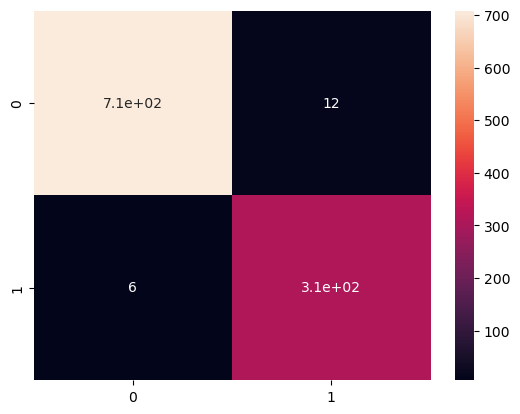

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(C=10.0)
lr.fit(X_train,Y_train)
Y_pred=lr.predict(X_test)
confusion_matrix(Y_test,Y_pred)
print(classification_report(Y_test,Y_pred))
print("The Accuracy is ",accuracy_score(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True)

              precision    recall  f1-score   support

           0       0.99      0.77      0.86       720
           1       0.65      0.98      0.78       315

    accuracy                           0.83      1035
   macro avg       0.82      0.88      0.82      1035
weighted avg       0.89      0.83      0.84      1035



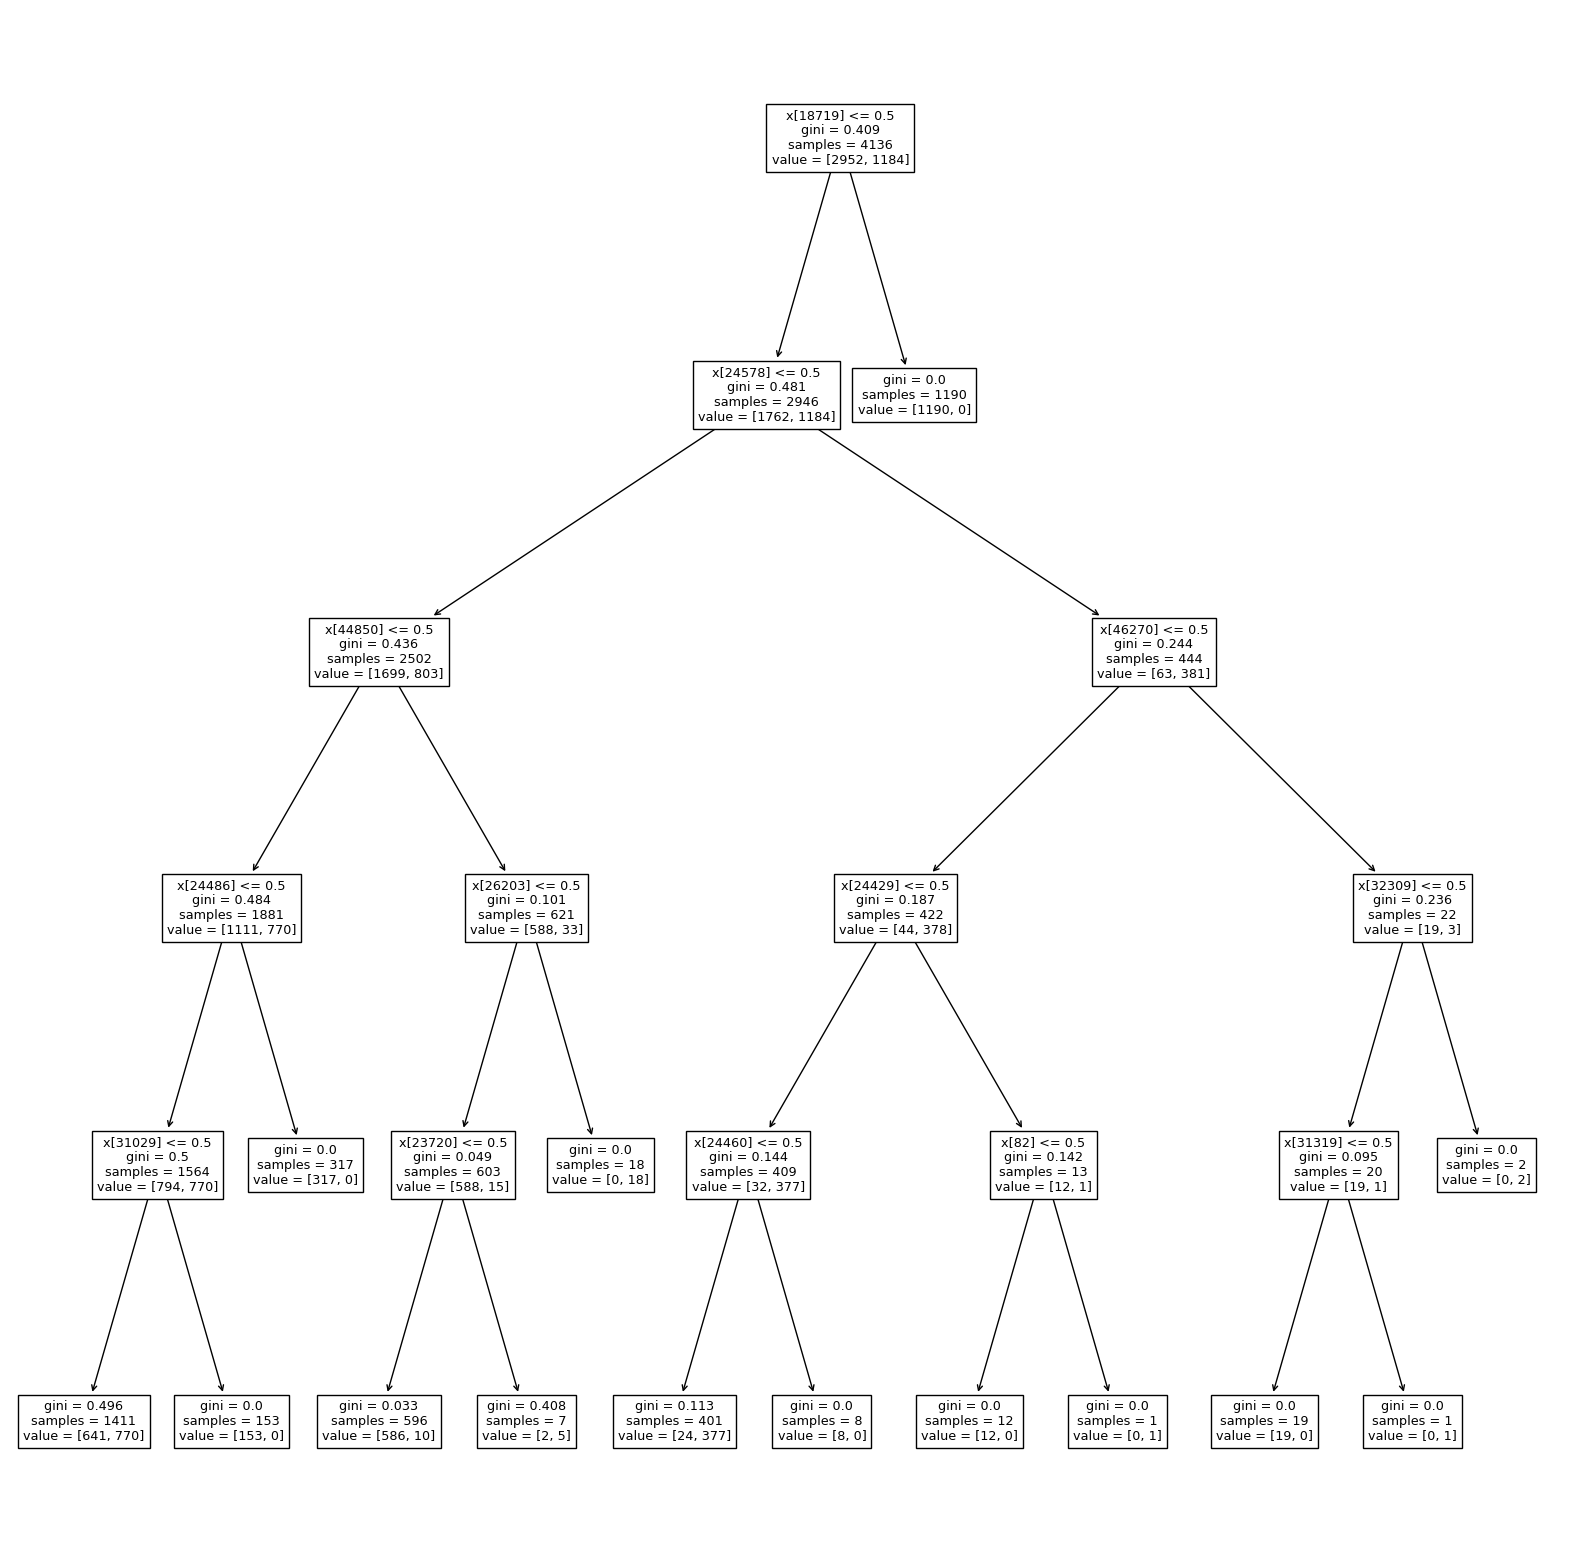

The Accuracy is 0.8328502415458937


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
print(classification_report(Y_test,Y_pred))
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,Y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dt)
plt.show()
print("The Accuracy is",accuracy_score(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       720
           1       0.76      0.91      0.83       315

    accuracy                           0.88      1035
   macro avg       0.86      0.89      0.87      1035
weighted avg       0.90      0.88      0.89      1035

The Accuracy is 0.8840579710144928


<Axes: >

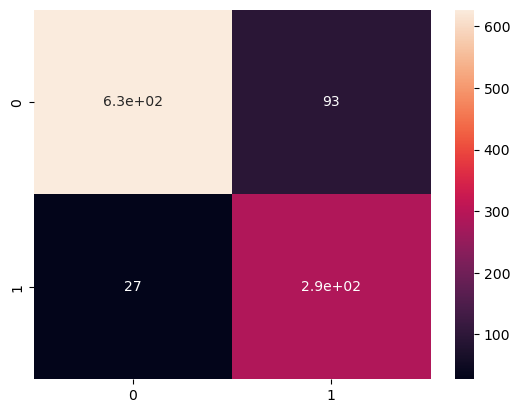

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
Y_pred=neigh.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("The Accuracy is",accuracy_score(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       720
           1       0.95      0.93      0.94       315

    accuracy                           0.96      1035
   macro avg       0.96      0.95      0.96      1035
weighted avg       0.96      0.96      0.96      1035

The Accuracy is 0.9642512077294686


<Axes: >

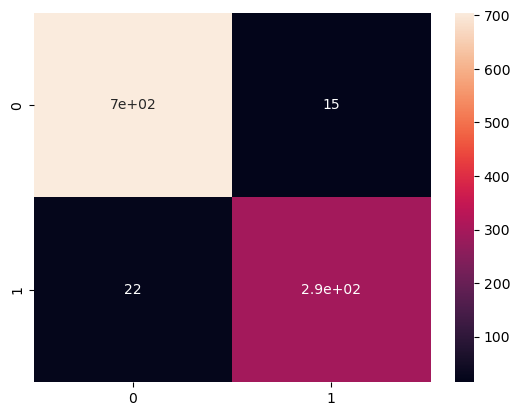

In [18]:
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("The Accuracy is",accuracy_score(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True)

The Accuracy Score is 0.9642512077294686


<Axes: >

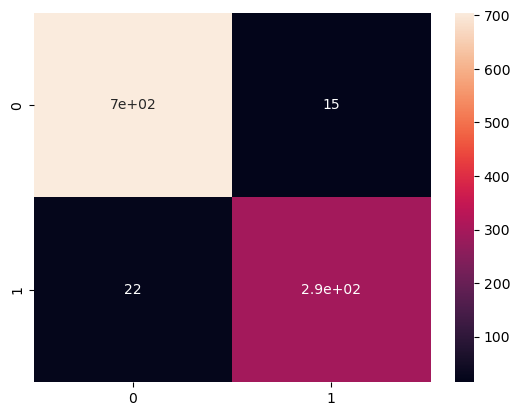

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,min_samples_split=2,max_depth=10,max_features=7)
rf=rf.fit(X_train,Y_train)
cross_val_score(rf,X_train,Y_train,cv=10).mean()
print("The Accuracy Score is",accuracy_score(Y_test,Y_pred))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot = True)

In [20]:
def check(text):
    a= []
    df =data_set() 
    X = df['text']
    y = df['label_num']
    vectorizer=CountVectorizer()
    X = vectorizer.fit_transform(X)
    new_email_features = vectorizer.transform([text])
    
    model = MultinomialNB()
    model.fit(X, y)
    prediction = model.predict(new_email_features)
    a.append(prediction[0])
    
    dt=DecisionTreeClassifier(max_depth=5)
    dt.fit(X,y)
    prediction = dt.predict(new_email_features)
    a.append(prediction[0])
    
    lr=LogisticRegression(C=10.0)
    lr.fit(X,y)
    prediction = lr.predict(new_email_features)
    a.append(prediction[0])
    
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X,y)
    prediction = neigh.predict(new_email_features)
    a.append(prediction[0])
    
    model=svm.SVC(kernel='linear')
    model.fit(X,y)
    prediction=model.predict(new_email_features)
    a.append(prediction[0])
    
    
    if a.count(0) < a.count(1):
        return "The email is spam!"
    else:
        return "The email is not spam." 

In [21]:
app1 = gr.Interface(fn=data_set,inputs=None, outputs=gr.Dataframe(),description="Reading csv")
app3 = gr.Interface(fn=check, inputs='text', outputs='text',description=" result")
demo = gr.TabbedInterface([app1, app3], ["Reading_csv", "result"])
demo.launch()

C:\Users\karpa\anaconda3\lib\site-packages\gradio\blocks.py:897: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [22]:
#Without GUI

In [24]:
text = input("Enter the Mail :")
a= []
df =data_set() 
X = df['text']
y = df['label_num']
vectorizer=CountVectorizer()
X = vectorizer.fit_transform(X)
new_email_features = vectorizer.transform([text])

model = MultinomialNB()
model.fit(X, y)
prediction = model.predict(new_email_features)
a.append(prediction[0])
print("The Predction of NB is ",prediction[0])

dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X,y)
prediction = dt.predict(new_email_features)
a.append(prediction[0])
print("The Predction of DTree is ",prediction[0])


lr=LogisticRegression(C=10.0)
lr.fit(X,y)
prediction = lr.predict(new_email_features)
a.append(prediction[0])
print("The Predction of LR is ",prediction[0])


neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
prediction = neigh.predict(new_email_features)
a.append(prediction[0])
print("The Predction of Knn is ",prediction[0])


model=svm.SVC(kernel='linear')
model.fit(X,y)
prediction=model.predict(new_email_features)
a.append(prediction[0])
print("The Predction of svm is ",prediction[0])


if a.count(0) < a.count(1):
    print("The email is spam!")
else:
    print("The email is not spam." )

Enter the Mail :"Subject: vic . odin n ^ ow berne hotbox carnal bride cutworm dyadic guardia continuous born gremlin akin counterflow hereafter vocabularian pessimum yaounde cannel bitch penetrate demagogue arbitrary egregious adenosine rubin gil luminosity delicti yarmulke sauterne selfadjoint agleam exeter picofarad consulate dichotomous boyhood balfour spheric frey pillory hoosier fibonacci cat handful "
The Predction of NB is  1
The Predction of DTree is  1


C:\Users\karpa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Predction of LR is  1
The Predction of Knn is  1
The Predction of svm is  1
The email is spam!


C:\Users\karpa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
